<a href="https://colab.research.google.com/github/Arn0Dorain/NLPProjects/blob/main/Review_BagOfWords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predict The Positive and Negative Words in Revivews Using Bag Of Words Approach(NLP) & Logistic Regression**


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data1= pd.read_csv('/content/drive/MyDrive/Reviews.csv')

In [3]:
data1.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
list=data1.columns 

In [5]:
list

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
data1['HelpfulnessDenominator']


0         1
1         0
2         1
3         3
4         0
         ..
568449    0
568450    0
568451    2
568452    1
568453    0
Name: HelpfulnessDenominator, Length: 568454, dtype: int64

In [7]:
data1['HelpfulnessNumerator']

0         1
1         0
2         1
3         3
4         0
         ..
568449    0
568450    0
568451    2
568452    1
568453    0
Name: HelpfulnessNumerator, Length: 568454, dtype: int64

In [8]:
data1['HelpPercentage'] =np.where(data1['HelpfulnessDenominator']>0,data1['HelpfulnessNumerator']/data1['HelpfulnessDenominator'],-1)

In [9]:
data1.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'HelpPercentage'],
      dtype='object')

In [10]:
data1['HelpPercentage'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [11]:
data1['HelpPercentage'].size

568454

In [12]:
data1['UpVotePercent']=pd.cut(data1['HelpPercentage'],bins =[-1,0,0.2,0.4,0.6,0.8,1],labels=['Empty','0-20%','20-40','40-60','60-80','80-100'])

In [13]:
data1.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'HelpPercentage', 'UpVotePercent'],
      dtype='object')

In [14]:
data1.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpPercentage,UpVotePercent
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,-1.0,NaN
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-1.0,NaN
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,80-100
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.0,80-100
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,...",-1.0,NaN


In [15]:
data1.groupby(['Score','UpVotePercent']).agg('count')

Id  ProductId  UserId  ...  Summary    Text  HelpPercentage
Score UpVotePercent                             ...                                 
1     Empty            8060       8060    8060  ...     8060    8060            8060
      0-20%            2338       2338    2338  ...     2338    2338            2338
      20-40            4649       4649    4649  ...     4649    4649            4649
      40-60            6586       6586    6586  ...     6586    6586            6586
      60-80            5838       5838    5838  ...     5838    5838            5838
      80-100          12531      12531   12531  ...    12531   12531           12531
2     Empty            4234       4234    4234  ...     4234    4234            4234
      0-20%             762        762     762  ...      737     762             762
      20-40            1618       1618    1618  ...     1618    1618            1618
      40-60            3051       3051    3051  ...     3051    3051            3051
      60-80            2486       2486    2486  ...     2486    2486            2486
      80-100           7014       7014    7014  ...     7014    7014            7014
3     Empty            5062       5062    5062  ...     5062    5062            5062
      0-20%             474        474     474  ...      474     474             474
      20-40            1506       1506    1506  ...     1506    1506            1506
      40-60            3384       3384    3384  ...     3384    3384            3384
      60-80            2754       2754    2754  ...     2754    2754            2754
      80-100          11037      11037   11037  ...    11036   11037           11037
4     Empty            4780       4780    4780  ...     4780    4780            4780
      0-20%             116        116     116  ...      116     116             116
      20-40             909        909     909  ...      909     909             909
      40-60            3185       3185    3185  ...     3185    3185            3185
      60-80            2941       2941    2941  ...     2941    2941            2941
      80-100          26707      26707   26707  ...    26707   26707           26707
5     Empty           11638      11638   11638  ...    11638   11638           11638
      0-20%             432        432     432  ...      432     432             432
      20-40            2275       2275    2275  ...     2275    2275            2275
      40-60           10312      10312   10312  ...    10312   10312           10312
      60-80           11060      11060   11060  ...    11060   11060           11060
      80-100         140661     140661  140661  ...   140661  140661          140661

[30 rows x 10 columns]

In [16]:
data1_sam = data1.groupby(['Score','UpVotePercent']).agg({'Id':'count'}).reset_index()

In [17]:
data1_sam

,Score,UpVotePercent,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40,4649
3,1,40-60,6586
4,1,60-80,5838
5,1,80-100,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40,1618
9,2,40-60,3051


In [20]:
data1_pivot = data1_sam.pivot_table(index='UpVotePercent',columns='Score')
data1_pivot

Id                            
Score              1     2      3      4       5
UpVotePercent                                   
Empty           8060  4234   5062   4780   11638
0-20%           2338   762    474    116     432
20-40           4649  1618   1506    909    2275
40-60           6586  3051   3384   3185   10312
60-80           5838  2486   2754   2941   11060
80-100         12531  7014  11037  26707  140661

In [68]:
data1_pivot.describe()

Id                                                        
Score           1            2             3             4              5
count      6.0000     6.000000      6.000000      6.000000       6.000000
mean    6667.0000  3194.166667   4036.166667   6439.666667   29396.333333
std     3459.2864  2217.841871   3774.229692  10069.060049   54717.669317
min     2338.0000   762.000000    474.000000    116.000000     432.000000
25%     4946.2500  1835.000000   1818.000000   1417.000000    4284.250000
50%     6212.0000  2768.500000   3069.000000   3063.000000   10686.000000
75%     7691.5000  3938.250000   4642.500000   4381.250000   11493.500000
max    12531.0000  7014.000000  11037.000000  26707.000000  140661.000000

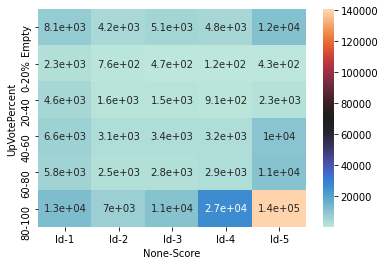

In [22]:
sns.heatmap(data1_pivot,annot=True,cmap='icefire')

In [23]:
  #data1_pivot.to_csv("SemiProcessed.csv",index=False)

In [24]:
data1['Score'].unique()

array([5, 1, 4, 2, 3])

In [28]:
#Removing Neutral Reviews Score i,e 3  and copying rest to new data2 
data2 = data1[data1['Score']!=3]
data2['Score'].unique()

In [31]:
data2.tail()


array([5, 1, 4, 2])

In [30]:
X = data2['Text']

In [33]:
y_dictionary ={1:0,2:0,5:1,4:1}
Y = data2['Score'].map(y_dictionary)

In [41]:
CvCt = CountVectorizer(stop_words='english')

In [42]:
X_Cv = CvCt.fit_transform(X)

In [43]:
X_Cv.shape

(525814, 114969)

In [45]:
X_train,X_test, Y_train , Y_test = train_test_split(X_Cv,Y)

In [46]:
X_test.shape

(131454, 114969)

In [47]:
Y_test.shape

(131454,)

In [48]:
Y_train.shape

(394360,)

In [51]:
logReg = LogisticRegression()

In [53]:
#training data into Logistic Regression model
logModel = logReg.fit(X_train,Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
#Testing the Model accuracy
logModel.score(X_test,Y_test)

0.9358863176472378

In [59]:
w = CvCt.get_feature_names()

In [57]:
Coefficent = logModel.coef_.tolist()[0]

In [60]:
Coeff_Data = pd.DataFrame({'Word':w ,'Coefficient':Coefficent})

In [63]:
PosNegRev  = Coeff_Data.sort_values(['Coefficient','Word'])

In [69]:
#Top 15 Negative Words in Reviews
PosNegRev.head(15)


,Word,Coefficient
107383,undrinkable,-3.852622
34989,deceptive,-3.544471
24949,cancelled,-3.214438
106852,unacceptable,-3.156082
113164,worst,-3.136914
65064,lousy,-3.080484
88945,ripoff,-2.878368
37560,disappointing,-2.861000
37528,disapointed,-2.856344
88351,returnable,-2.827314


In [70]:
#Top 15 Positive words in Reviews
PosNegRev.tail(15)

,Word,Coefficient
111911,whim,2.209464
35726,delish,2.263913
40342,economical,2.366420
39214,drawback,2.373360
87967,resist,2.383865
35691,delighted,2.399365
102857,terrific,2.421015
55029,hooked,2.448567
54130,hesitant,2.500389
113138,worries,2.538374


In [72]:
PosNegRev.tail(100).to_csv("PositiveWords.csv",index=False)

In [73]:
PosNegRev.head(100).to_csv("NegativeWords.csv",index=False)